In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.pipeline import make_pipeline
import seaborn as sns
sns.set()
import pickle

In [2]:
data_preprocessed = pd.read_csv('Preprocessed-file.csv')

In [3]:
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [4]:
targets = data_preprocessed['log_price']

In [5]:
unscaled_inputs = data_preprocessed.drop(['log_price'], axis=1)

In [6]:
scaler = StandardScaler()
scaler.fit(unscaled_inputs)

StandardScaler()

In [7]:
scaled_inputs = scaler.transform(unscaled_inputs)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, test_size = 0.2, random_state=42)

In [9]:
reg = LinearRegression()

In [10]:
reg.fit(x_train,y_train)

LinearRegression()

In [11]:
y_hat = reg.predict(x_train)

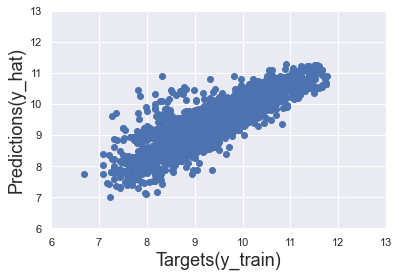

In [12]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets(y_train)', size=18)
plt.ylabel('Predictions(y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residual PDF')

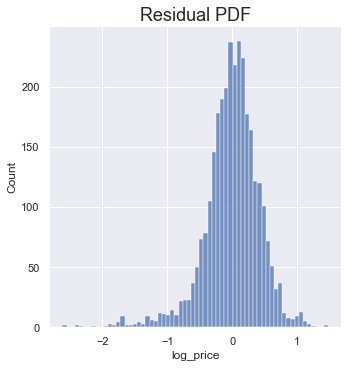

In [13]:
sns.displot(y_train-y_hat)
plt.title('Residual PDF', size = 18)

In [14]:
reg.score(x_train,y_train)

0.7546487921881218

In [15]:
def adj_r2(x,y):
    r2 = reg.score(x_train,y_train)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [16]:
adj_r2(x_train,y_train)

0.7532923790067227

In [17]:
reg.intercept_

9.421003614148074

In [18]:
reg.coef_

array([-0.46815598,  0.21526817,  0.01105151,  0.00569157, -0.14247174,
       -0.18769337, -0.06529696, -0.09898873, -0.13980763, -0.09384461,
       -0.17892753, -0.11457574, -0.15668036, -0.11685263, -0.02572253,
       -0.15106183,  0.31442123])

In [19]:
reg_summary = pd.DataFrame(unscaled_inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.468156
1,EngineV,0.215268
2,Brand_BMW,0.011052
3,Brand_Mercedes-Benz,0.005692
4,Brand_Mitsubishi,-0.142472
5,Brand_Renault,-0.187693
6,Brand_Toyota,-0.065297
7,Brand_Volkswagen,-0.098989
8,Body_hatch,-0.139808
9,Body_other,-0.093845


In [20]:
reg_summary.index = reg_summary.index + 1
reg_summary.loc[0] = ['Intercept', reg.intercept_]
reg_summary = reg_summary.sort_index()
reg_summary

,Features,Weights
0,Intercept,9.421004
1,Mileage,-0.468156
2,EngineV,0.215268
3,Brand_BMW,0.011052
4,Brand_Mercedes-Benz,0.005692
5,Brand_Mitsubishi,-0.142472
6,Brand_Renault,-0.187693
7,Brand_Toyota,-0.065297
8,Brand_Volkswagen,-0.098989
9,Body_hatch,-0.139808


In [21]:
y_hat_test = reg.predict(x_test)

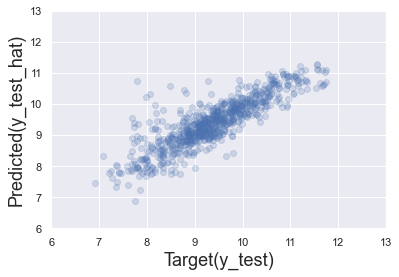

In [22]:
plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.xlabel('Target(y_test)', size=18)
plt.ylabel('Predicted(y_test_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [23]:
y_test = y_test.reset_index(drop=True) # the data hard alot of missing values due to the old indexing

In [24]:
actual_prices = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
actual_prices['Targets'] = np.exp(y_test)
actual_prices['Residual'] = actual_prices['Targets'] - actual_prices['Predictions']
actual_prices['Difference%'] = np.absolute(actual_prices['Residual']/actual_prices['Targets']*100)
actual_prices.head()

,Predictions,Targets,Residual,Difference%
0,40419.308971,21300.0,-19119.308971,89.762014
1,7956.895960,8900.0,943.104040,10.596675
2,5757.284408,3250.0,-2507.284408,77.147213
3,9765.810605,12000.0,2234.189395,18.618245
4,7027.363814,5400.0,-1627.363814,30.136367


## Model evaluation 

In [25]:
def model_evaluation(reg, x_test, y_test, model_name):
    y_hat_test = reg.predict(x_test)
    
    MAE = metrics.mean_absolute_error(y_test, y_hat_test)
    MSE = metrics.mean_squared_error(y_test, y_hat_test)
    RMSE = np.sqrt(MSE)
    R2_score = metrics.r2_score(y_test, y_hat_test)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_score], index=['MAE', 'MSE', 'RMSE', 'R2_score'], columns=[model_name])

In [26]:
# Model performance on Test data.
model_evaluation(reg, x_test, y_test, 'Linear Reg Test')

,Linear Reg Test
MAE,0.329408
MSE,0.218183
RMSE,0.467100
R2_score,0.735275


In [27]:
# Model performance on training data
model_evaluation(reg, x_train, y_train, 'Linear Reg Train')

,Linear Reg Train
MAE,0.311336
MSE,0.184839
RMSE,0.429929
R2_score,0.754649


In [28]:
# Model evaluation using cross-validation

#load the data
x = scaled_inputs
y = targets
#define the pipeline
pipeline = make_pipeline(StandardScaler(), LinearRegression())
# Define cross-validation strategy
kf = KFold(n_splits =6, shuffle=True, random_state=42)
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
# perform cross-validation
result = cross_validate(pipeline, x, y, cv=kf, return_train_score=True, scoring=scoring)

MAE_mean = (-result['test_neg_mean_absolute_error']).mean()
MAE_std = (-result['test_neg_mean_absolute_error']).std()
MSE_mean = (-result['test_neg_mean_squared_error']).mean()
MSE_std = (-result['test_neg_mean_squared_error']).std()
RMSE_mean = (-result['test_neg_root_mean_squared_error']).mean()
RMSE_std = (-result['test_neg_root_mean_squared_error']).std()
r2_score_mean = result['test_r2'].mean()
r2_score_std = result['test_r2'].std()

pd.DataFrame({'Mean': [MAE_mean,MSE_mean,RMSE_mean,r2_score_mean], 'Std': [MAE_std,MSE_std,RMSE_std,r2_score_std]}, index=[ 'MAE', 'MSE', 'RMSE', 'R2_Score'])

,Mean,Std
MAE,0.317327,0.015426
MSE,0.193220,0.026080
RMSE,0.438492,0.030745
R2_Score,0.748100,0.030813


In [29]:
with open('modelL','wb') as file:
    pickle.dump(reg,file)

In [30]:
with open('scalerL','wb') as file:
    pickle.dump(scaler,file)